In [2]:
from keras.applications import VGG16
from keras import models
from keras import layers
conv_base=VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
for layers in conv_base.layers[:-4]:
        layers.trainable=False

58892288/58889256 [==============================] - 0s 0us/step


In [3]:
for layers in conv_base.layers:
    print(layers.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True


In [5]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [7]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [8]:
!kaggle datasets download -d deleakanbi/cats-and-dogs-small

 84% 73.0M/86.6M [00:01<00:00, 37.4MB/s]
100% 86.6M/86.6M [00:01<00:00, 77.8MB/s]


In [9]:
!unzip cats-and-dogs-small.zip

Archive:  cats-and-dogs-small.zip
  inflating: test/cats/cat.1501.jpg  
  inflating: test/cats/cat.1502.jpg  
  inflating: test/cats/cat.1503.jpg  
  inflating: test/cats/cat.1504.jpg  
  inflating: test/cats/cat.1505.jpg  
  inflating: test/cats/cat.1506.jpg  
  inflating: test/cats/cat.1507.jpg  
  inflating: test/cats/cat.1508.jpg  
  inflating: test/cats/cat.1509.jpg  
  inflating: test/cats/cat.1510.jpg  
  inflating: test/cats/cat.1511.jpg  
  inflating: test/cats/cat.1512.jpg  
  inflating: test/cats/cat.1513.jpg  
  inflating: test/cats/cat.1514.jpg  
  inflating: test/cats/cat.1515.jpg  
  inflating: test/cats/cat.1516.jpg  
  inflating: test/cats/cat.1517.jpg  
  inflating: test/cats/cat.1518.jpg  
  inflating: test/cats/cat.1519.jpg  
  inflating: test/cats/cat.1520.jpg  
  inflating: test/cats/cat.1521.jpg  
  inflating: test/cats/cat.1522.jpg  
  inflating: test/cats/cat.1523.jpg  
  inflating: test/cats/cat.1524.jpg  
  inflating: test/cats/cat.1525.jpg  
  inflating: tes

In [23]:
from  keras.preprocessing.image import ImageDataGenerator

In [24]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [25]:
train_dir='/content/train'
validation_dir='/content/validation'
test_dir='/content/test'

In [26]:
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 2000 images belonging to 2 classes.


In [27]:
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 1000 images belonging to 2 classes.


In [28]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-5),
metrics=['acc'])


In [29]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 19s 112ms/step - loss: 0.5101 - acc: 0.7807 - val_loss: 0.2642 - val_acc: 0.8920
Epoch 2/100
100/100 [==============================] - 11s 110ms/step - loss: 0.2057 - acc: 0.9249 - val_loss: 0.2102 - val_acc: 0.9100
Epoch 3/100
100/100 [==============================] - 11s 111ms/step - loss: 0.1406 - acc: 0.9479 - val_loss: 0.2076 - val_acc: 0.9170
Epoch 4/100
100/100 [==============================] - 11s 113ms/step - loss: 0.0870 - acc: 0.9778 - val_loss: 0.1888 - val_acc: 0.9190
Epoch 5/100
100/100 [==============================] - 11s 110ms/step - loss: 0.0634 - acc: 0.9842 - val_loss: 0.1876 - val_acc: 0.9250
Epoch 6/100
100/100 [==============================] - 11s 111ms/step - loss: 0.0374 - acc: 0.9915 - val_loss: 0.1999 - val_acc: 0.9220
Epoch 7/100
100/100 [==============================] - 11s 110ms/step - loss: 0.0234 - acc: 0.9980 - val_loss: 0.1895 - val_acc: 0.9320
Epoch 8/100
100/100 [===========================

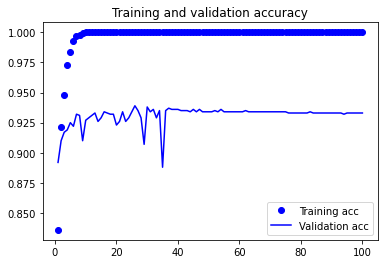

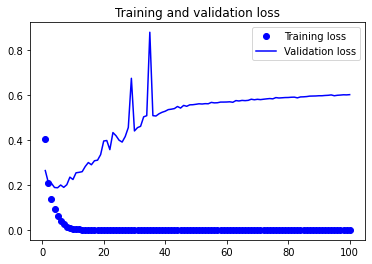

In [31]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()